<a href="https://colab.research.google.com/github/fillerInk/ml-with-projects/blob/main/2_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml('mnist_784')
x,y = mnist["data"],mnist["target"]

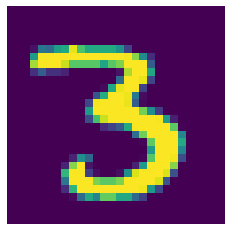

In [4]:
some_digit = x[12]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image)
plt.axis("off")
plt.show()

In [5]:
from sklearn.linear_model import SGDClassifier

In [6]:
x_train, x_test, y_train, y_test = x[:60000],x[60000:],y[:60000],y[60000:]
shuffle_index = np.random.permutation(60000)
x_train,y_train = x_train[shuffle_index],y_train[shuffle_index]

In [7]:
model = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)

In [19]:
model.fit(x_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=-inf, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [20]:
model.score(x_test,y_test)

0.8749

In [21]:
model.predict(x_test[:10])

array(['7', '2', '1', '0', '4', '1', '4', '9', '4', '9'], dtype='<U1')

In [22]:
print(y_test[:10])

['7' '2' '1' '0' '4' '1' '4' '9' '5' '9']


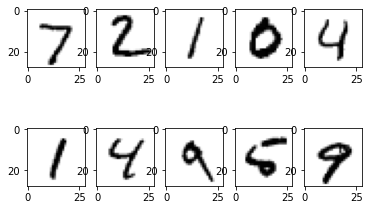

In [23]:
fig = plt.figure()
for i in range(10):
    plottable_image = np.reshape(x_test[i], (28, 28))
    ax = fig.add_subplot(2, 5, i+1)
    ax.imshow(plottable_image, cmap='gray_r')

## Model #4 - Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
randomForestModel = RandomForestClassifier()

In [26]:
randomForestModel.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
randomForestModel.score(x_test,y_test)

0.9703

In [28]:
randomForestModel.predict(x_test[:10])

array(['7', '2', '1', '0', '4', '1', '4', '9', '5', '9'], dtype=object)

In [29]:
print(y_test[:10])

['7' '2' '1' '0' '4' '1' '4' '9' '5' '9']


## Model #5 - Feed Forward Neural Network 

In [60]:
import os
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Dropout
from keras.utils import np_utils
from keras.datasets import mnist

In [44]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

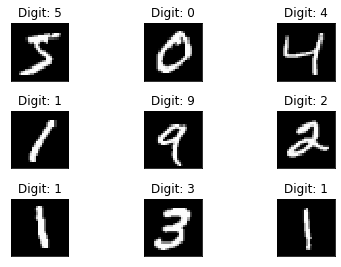

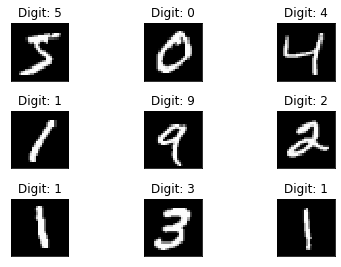

In [46]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [47]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

In [50]:
n_classes = 10
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

In [51]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

In [53]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

Epoch 1/20
469/469 - 5s - loss: 0.0108 - accuracy: 0.9968 - val_loss: 0.1017 - val_accuracy: 0.9837
Epoch 2/20
469/469 - 5s - loss: 0.0113 - accuracy: 0.9967 - val_loss: 0.1160 - val_accuracy: 0.9826
Epoch 3/20
469/469 - 5s - loss: 0.0099 - accuracy: 0.9970 - val_loss: 0.0931 - val_accuracy: 0.9846
Epoch 4/20
469/469 - 5s - loss: 0.0121 - accuracy: 0.9965 - val_loss: 0.0894 - val_accuracy: 0.9846
Epoch 5/20
469/469 - 5s - loss: 0.0090 - accuracy: 0.9976 - val_loss: 0.1153 - val_accuracy: 0.9823
Epoch 6/20
469/469 - 5s - loss: 0.0107 - accuracy: 0.9969 - val_loss: 0.1025 - val_accuracy: 0.9852
Epoch 7/20
469/469 - 5s - loss: 0.0101 - accuracy: 0.9970 - val_loss: 0.0917 - val_accuracy: 0.9857
Epoch 8/20
469/469 - 5s - loss: 0.0072 - accuracy: 0.9977 - val_loss: 0.1052 - val_accuracy: 0.9829
Epoch 9/20
469/469 - 5s - loss: 0.0088 - accuracy: 0.9976 - val_loss: 0.1009 - val_accuracy: 0.9825
Epoch 10/20
469/469 - 5s - loss: 0.0096 - accuracy: 0.9970 - val_loss: 0.0939 - val_accuracy: 0.9840

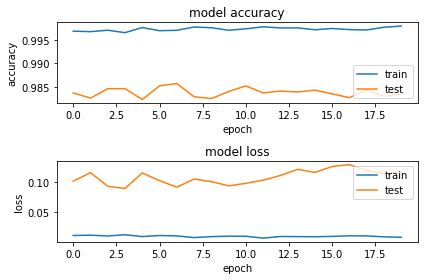

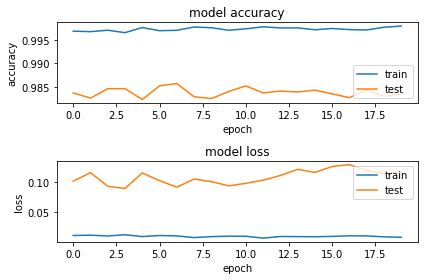

In [57]:
# training the model and saving metrics in history
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))

# saving the model
save_dir = "/results/"
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

In [61]:
mnist_model = load_model('/results/keras_mnist.h5' )
loss_and_metrics = mnist_model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 1s - loss: 0.1166 - accuracy: 0.9835
Test Loss 0.11656983941793442
Test Accuracy 0.9835000038146973
